# Implementation of Lloyds

**Farzad Habibi - 810195383**

We use this algorithm to quantize diffrent distribiution as a non-uniform quantization. 
In this computer Assignment we implement this algorithm and use Guassian distribiution as an example.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import norm

## Guassian Distribiution


We can use norm function from scipy library :

In [2]:
guassian = lambda x, sigma: norm(0, sigma).pdf(x)

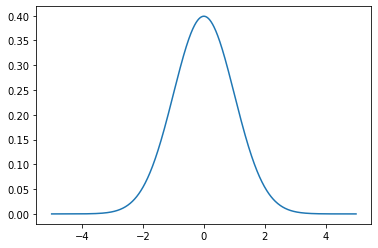

In [3]:
x = np.linspace(-5, 5, 1000)
plt.plot(x, guassian(x, 1.0))

Or we can implement the guassian distribution pdf from the scratch.
$$
\frac{1}{\sqrt{2 \pi \sigma ^2}} e^{-\frac{x^2}{2\sigma ^ 2}}
$$

In [4]:
g_x = lambda x, sigma: (1 / (math.sqrt(math.pi * 2 * sigma**2))) * (math.e ** -(x**2 / (2 * sigma **2)))

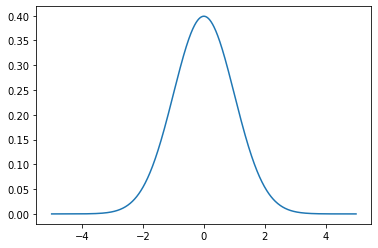

In [5]:
x = np.linspace(-5, 5, 1000)
plt.plot(x, g_x(x, 1.0))

So we can use normal random like this to get our sample:

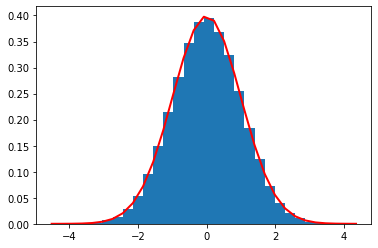

In [6]:
s = np.random.normal(0, 1.0, 100000)
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, g_x(bins, 1.0), linewidth=2, color='r')

## Lloyds Algorithm

In [7]:
def select_optional_boundries(number_of_regions, x):
    return np.linspace(min(x), max(x), number_of_regions+1)[1:-1]

In [8]:
def select_new_candidates(u, x):
    c = []
    for i in range(len(u) + 1):
        last_u = u[i-1] if i != 0 else -math.inf
        current_u = u[i] if i != len(u) else math.inf

        sums = []
        x_u = x[(x > last_u) & (x <= current_u)]
        for k in range(len(x_u)):
            sums.append(sum((x_u - x_u[k]) ** 2))
        sums = np.array(sums)
        try:
            c_i = x_u[np.argmin(sums)]
        except e:
            c_i = (last_u + current_u)/2
        c.append(c_i)
    return np.array(c)

In [9]:
def update_boundries(u, c):
    new_u = np.array(u)
    for i in range(len(c) - 1):
        new_u[i] = (c[i] + c[i+1]) / 2
    return new_u

In [10]:
def lloyds(sigma, b, n = 1000):
    number_of_regions = b**2
    x = np.random.normal(0, sigma, n)
    u = select_optional_boundries(number_of_regions, x)
    while True:
        c = select_new_candidates(u, x)
        new_u = update_boundries(u, c)
        if np.array_equal(new_u, u): break;
        else : u = new_u
    return c, u, x

So the final algorithm's function which get `sigma` and `b` as input and returns `c` is something like this:

In [11]:
def lloyds_returns_c(sigma, b, n = 1000):
    c, u, x = lloyds(sigma, b, n)
    return c

In [12]:
lloyds_returns_c(1.0, 4)

array([-3.12802448, -2.55331325, -2.19786228, -1.74787842, -1.34320155,
       -0.96081635, -0.58434209, -0.23254299,  0.11343542,  0.46353521,
        0.82487814,  1.17653459,  1.58077879,  1.94253096,  2.38497875,
        3.17934373])

## Plot Boundries
In this section we will plot boundries for some examples:

In [13]:
def plot_boundries(sigma, b, n=2000, bins_num=50):
    c, u, x = lloyds(sigma, b, n)
    count, bins, ignored = plt.hist(x, bins_num, density=True)
    plt.plot(bins, g_x(bins, sigma), linewidth=2, color='r')
    plt.vlines(u, 0, max(guassian(bins, sigma)), colors=['y'], linestyles=['dotted'] )
    

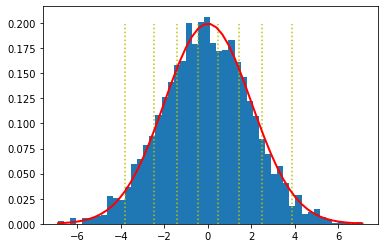

In [14]:
plot_boundries(2.0, 3, n=4000)

We can also animate itterations of lloyds

In [15]:
def animate_lloyds(sigma, b, n=2000, bins_num=50, save=False, save_name="foo.gif"):
    def lloyds_for_all_periods(sigma, b, n = 1000):
        number_of_regions = b**2
        x = np.random.normal(0, sigma, n)
        u = select_optional_boundries(number_of_regions, x)
        us = [u]
        while True:
            c = select_new_candidates(u, x)
            new_u = update_boundries(u, c)
            us.append(new_u)
            if np.array_equal(new_u, u): break;
            else : u = new_u
        return c, u, x, us
    
    from IPython.display import HTML
    from celluloid import Camera
    c, u, x, us = lloyds_for_all_periods(sigma, b, n)
    fig = plt.figure()
    camera = Camera(fig)
    for j in us[:-2]:
        count, bins, ignored = plt.hist(x, 50, density=True, color='lightblue')
        plt.plot(bins, g_x(bins, sigma), linewidth=2, color='r')
        plt.vlines(j, 0, max(guassian(bins, sigma)), colors=['y'], linestyles=['dotted'] )
        camera.snap()
    animation = camera.animate()
    plt.close()
    if save: animation.save(save_name, writer = 'imagemagick')
    return HTML(animation.to_html5_video())

In [16]:
animate_lloyds(2.0, 3, 2000)